# Plots All Phase Diagrams for ABPs

In [2]:
import sys
sys.path.append('../')
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from Utils.graphing_helpers import (save_fig_pdf, edges_from_centers_log, edges_from_centers_linear)

In [19]:
# Set this to True to save PDFs of phase diagrams
save_figures = True

In [20]:
def get_saved_statistics_filepath(exp_dir: str, J: float, Dr: float) -> str:
    """
    Returns the path for single run statistics file based on this project's convention.
    """
    statistics_filepath = os.path.join(exp_dir, f'J={J:.4f}_and_Dr={Dr:.4f}', 'single_stats.json')
    return statistics_filepath

def get_saved_statistics_data(exp_dir: str, J: float, Dr: float) -> dict:
    """
    Reads single run statistics file and returns values.
    """
    saved_statistics_filepath = get_saved_statistics_filepath(exp_dir, J, Dr)
    if os.path.isfile(saved_statistics_filepath):
        with open(saved_statistics_filepath) as stats_file:
            stats = json.loads(stats_file.read())
    else:
        raise ValueError('No such statistics directory to read.')
    return stats

def load_and_organize_statistics_data(statistic_key: str, Dr_vals: np.ndarray, J_vals: np.ndarray, exp_dir: str) -> np.ndarray:
    """
    Reads multiple runs' statistics files and organizes data into 2d matrix.
    """
    if statistic_key not in ['vicsek_param', 'packing_std_dev', 'dir_cross_vel_norm']:
        return ValueError('Statistic key not recognized.')

    statistics_matrix_shape = (len(Dr_vals), len(J_vals))
    statistics_matrix = np.full(statistics_matrix_shape, np.nan)

    for Dr_index, Dr in enumerate(Dr_vals):
        for J_index, J in enumerate(J_vals):
            stats_data = get_saved_statistics_data(exp_dir, J, Dr)
            statistics_matrix[Dr_index, J_index] = stats_data[statistic_key]
    return statistics_matrix

# Vicsek Alignment

In [21]:
phi = 0.6 # packing fraction
v0 = 0.03 # self-propulsion velocity
J_vals = np.logspace(-3, 0, num=13) # alignment strengths simulated
Dr_vals = np.logspace(-3, 0, num=13)[:-2] # rotational noises simulated

# Folder location of saved data
save_dir = "/home/ryanlopez/Polar_Align_Box_L=200_July_8"
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(save_dir, exp_folder_name)

# To plot phase diagram, need coordinates of the corners of squares for pcolormesh
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)

### Flocking Order Parameter

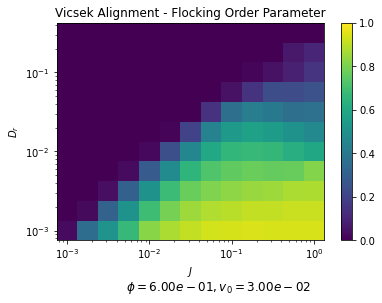

In [22]:
flocking_vals = load_and_organize_statistics_data('vicsek_param', Dr_vals, J_vals, exp_dir)

fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, flocking_vals, vmin=0, vmax=1)
plt.xlabel(r'$J$')
plt.ylabel(r'$D_r$')
plt.title('Vicsek Alignment - Flocking Order Parameter')
fig.text(.5, -0.05, rf'$\phi={phi:.2e}, v_0={v0:.2e}$', ha='center', fontsize=12)
plt.colorbar(plot)
plt.xscale('log')
plt.yscale('log')
if save_figures:
    save_fig_pdf(os.path.join(save_dir, 'phase_diagrams', 'flocking_diagram.pdf'))
plt.show()

### Phase Separation Order Parameter

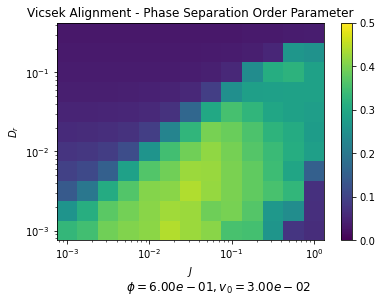

In [23]:
phase_separation_vals = load_and_organize_statistics_data('packing_std_dev', Dr_vals, J_vals, exp_dir)

fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, phase_separation_vals, vmin=0, vmax=0.5)
plt.xlabel(r'$J$')
plt.ylabel(r'$D_r$')
plt.title('Vicsek Alignment - Phase Separation Order Parameter')
fig.text(.5, -0.05, rf'$\phi={phi:.2e}, v_0={v0:.2e}$', ha='center', fontsize=12)
plt.colorbar(plot)
plt.xscale('log')
plt.yscale('log')
if save_figures:
    save_fig_pdf(os.path.join(save_dir, 'phase_diagrams', 'packing_std_dev_diagram.pdf'))
plt.show()

### Aster Order Parameter

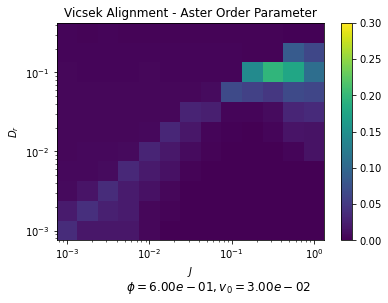

In [24]:
aster_vals = load_and_organize_statistics_data('dir_cross_vel_norm', Dr_vals, J_vals, exp_dir)

fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, aster_vals, vmin=0, vmax=0.3)
plt.xlabel(r'$J$')
plt.ylabel(r'$D_r$')
plt.title('Vicsek Alignment - Aster Order Parameter')
fig.text(.5, -0.05, rf'$\phi={phi:.2e}, v_0={v0:.2e}$', ha='center', fontsize=12)
plt.colorbar(plot)
plt.xscale('log')
plt.yscale('log')
if save_figures:
    save_fig_pdf(os.path.join(save_dir, 'phase_diagrams', 'aster_diagram.pdf'))
plt.show()

# Force Alignment

In [25]:
phi = 0.6 # packing fraction
v0 = 0.03 # self-propulsion velocity
Jv_vals = np.logspace(-4, 0, num=17) # effective alignment strengths simulated
J_vals = Jv_vals / v0
Dr_vals = np.logspace(-4, -1, num=13)[:-2] # rotational noises simulated

# Folder location of saved data
save_dir = "/home/ryanlopez/Force_Align_Box_L=200_July_8"
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(save_dir, exp_folder_name)

# To plot phase diagram, need coordinates of the corners of squares for pcolormesh
xedges = edges_from_centers_log(Jv_vals)
yedges = edges_from_centers_log(Dr_vals)

### Flocking Order Parameter

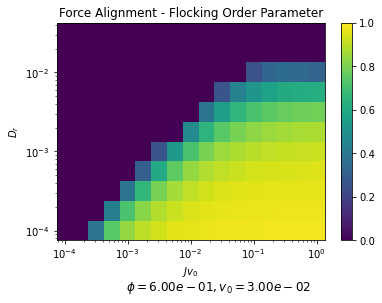

In [27]:
flocking_vals = load_and_organize_statistics_data('vicsek_param', Dr_vals, J_vals, exp_dir)

fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, flocking_vals, vmin=0, vmax=1)
plt.xlabel(r'$Jv_0$')
plt.ylabel(r'$D_r$')
plt.title('Force Alignment - Flocking Order Parameter')
fig.text(.5, -0.05, rf'$\phi={phi:.2e}, v_0={v0:.2e}$', ha='center', fontsize=12)
plt.colorbar(plot)
plt.xscale('log')
plt.yscale('log')
if save_figures:
    save_fig_pdf(os.path.join(save_dir, 'phase_diagrams', 'flocking_diagram.pdf'))
plt.show()

### Phase Separation Order Parameter

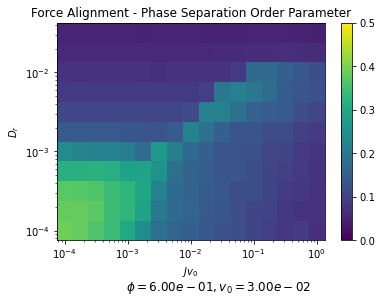

In [28]:
phase_separation_vals = load_and_organize_statistics_data('packing_std_dev', Dr_vals, J_vals, exp_dir)

fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, phase_separation_vals, vmin=0, vmax=0.5)
plt.xlabel(r'$Jv_0$')
plt.ylabel(r'$D_r$')
plt.title('Force Alignment - Phase Separation Order Parameter')
fig.text(.5, -0.05, rf'$\phi={phi:.2e}, v_0={v0:.2e}$', ha='center', fontsize=12)
plt.colorbar(plot)
plt.xscale('log')
plt.yscale('log')
if save_figures:
    save_fig_pdf(os.path.join(save_dir, 'phase_diagrams', 'packing_std_dev_diagram.pdf'))
plt.show()